In [26]:
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_dataset = pd.read_csv('./DATASET/Flights.csv', parse_dates=['FL_DATE'], low_memory=False).rename(columns=str.lower)

In [3]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450017 entries, 0 to 450016
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fl_date                450017 non-null  datetime64[ns]
 1   unique_carrier         450017 non-null  object        
 2   airline_id             450017 non-null  int64         
 3   tail_num               449378 non-null  object        
 4   fl_num                 450017 non-null  int64         
 5   origin_airport_id      450017 non-null  int64         
 6   origin_airport_seq_id  450017 non-null  int64         
 7   origin_city_market_id  450017 non-null  int64         
 8   origin                 450017 non-null  object        
 9   origin_city_name       450017 non-null  object        
 10  dest_airport_id        450017 non-null  int64         
 11  dest_airport_seq_id    450017 non-null  int64         
 12  dest_city_market_id    450017 non-null  int6

In [4]:
raw_dataset.describe()

,airline_id,fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,dest_airport_id,dest_airport_seq_id,dest_city_market_id,crs_dep_time,dep_time,...,crs_arr_time,arr_time,arr_delay,cancelled,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,unnamed: 32
count,450017.000000,450017.000000,450017.000000,4.500170e+05,450017.000000,450017.000000,4.500170e+05,450017.000000,450017.000000,441476.000000,...,450017.000000,440746.000000,439645.000000,450017.000000,97699.000000,97699.000000,97699.000000,97699.000000,97699.000000,0.0
mean,19900.483275,2079.643193,12698.267568,1.269830e+06,31738.603264,12698.024626,1.269805e+06,31738.404640,1327.757407,1333.947392,...,1506.278285,1487.332958,6.954484,0.019746,20.308836,3.368857,15.742495,0.079745,24.947492,NaN
std,385.381448,1722.700045,1534.326936,1.534324e+05,1286.063689,1534.246611,1.534244e+05,1285.791081,481.548320,494.957196,...,501.853851,523.821795,49.595992,0.139126,60.649157,27.809756,32.328181,2.896287,47.850860,NaN
min,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,10135.000000,1.013503e+06,30070.000000,5.000000,1.000000,...,1.000000,1.000000,-98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,19690.000000,679.000000,11292.000000,1.129202e+06,30647.000000,11292.000000,1.129202e+06,30647.000000,917.000000,921.000000,...,1120.000000,1108.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,19805.000000,1602.000000,12892.000000,1.289204e+06,31454.000000,12892.000000,1.289204e+06,31454.000000,1321.000000,1330.000000,...,1529.000000,1521.000000,-5.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,NaN
75%,20304.000000,3034.000000,14057.000000,1.405702e+06,32467.000000,14057.000000,1.405702e+06,32467.000000,1730.000000,1738.000000,...,1921.000000,1921.000000,11.000000,0.000000,17.000000,0.000000,20.000000,0.000000,31.000000,NaN
max,21171.000000,7439.000000,16218.000000,1.621801e+06,35991.000000,16218.000000,1.621801e+06,35991.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,1944.000000,1.000000,1934.000000,1934.000000,1457.000000,653.000000,1392.000000,NaN


In [5]:
raw_dataset.nunique()

fl_date                    31
unique_carrier             12
airline_id                 12
tail_num                 4390
fl_num                   6393
origin_airport_id         298
origin_airport_seq_id     298
origin_city_market_id     277
origin                    298
origin_city_name          294
dest_airport_id           297
dest_airport_seq_id       297
dest_city_market_id       276
dest                      297
dest_city_name            293
crs_dep_time             1186
dep_time                 1427
dep_delay                 896
taxi_out                  165
wheels_off               1429
wheels_on                1440
taxi_in                   168
crs_arr_time             1323
arr_time                 1440
arr_delay                 893
cancelled                   2
cancellation_code           4
carrier_delay             683
weather_delay             392
nas_delay                 383
security_delay             71
late_aircraft_delay       471
unnamed: 32                 0
dtype: int

In [6]:
print(raw_dataset.fl_date.min(),'\n',raw_dataset.fl_date.max())

2017-01-01 00:00:00 
 2017-01-31 00:00:00


In [7]:
raw_dataset = raw_dataset.drop('unnamed: 32', axis=1)

In [8]:
#2.3
raw_dataset = raw_dataset[raw_dataset.cancelled == 0]

In [9]:
distinct_airports = pd.concat([raw_dataset["origin"], raw_dataset["dest"]])
print(f"First ten airports: {distinct_airports.unique()[:10]}. Size: {distinct_airports.unique().size}")

First ten airports: ['JFK' 'LAX' 'DFW' 'OGG' 'HNL' 'SFO' 'ORD' 'MIA' 'IAH' 'BOS']. Size: 298


In [10]:
#2.4
ds_by_carrier = raw_dataset.groupby('unique_carrier')
ds_by_carrier.fl_date.count()

unique_carrier
AA     72152
AS     14454
B6     24077
DL     69031
EV     33878
F9      7598
HA      6258
NK     12129
OO     48266
UA     42171
VX      5645
WN    105472
Name: fl_date, dtype: int64

In [11]:
def get_cols():
    return ['dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']

mean_carriers = ds_by_carrier[get_cols()].mean()
mean_carriers

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
unique_carrier,,,,,,,
AA,7.466917,3.307004,18.736410,2.352168,15.370026,0.178156,18.742267
AS,5.220769,3.311553,11.736505,3.820850,18.615047,0.169028,19.189946
B6,14.132533,8.423231,20.297641,1.436562,15.223725,0.312820,29.282627
DL,13.512205,4.305279,30.858959,9.572160,16.836252,0.033901,21.964020
EV,17.687791,13.173011,36.329407,1.368504,15.794439,0.000000,31.725109
F9,16.566333,12.076791,16.748299,0.870295,19.070295,0.000000,31.091610
HA,2.916427,3.617181,29.941714,0.897143,0.251429,0.122286,14.113143
NK,11.680600,8.993642,9.080825,0.732499,43.840041,0.035171,12.137978
OO,15.194941,12.528524,23.495640,4.633053,15.186582,0.100759,31.316244


In [12]:
mean_carriers.mean(axis=1)

unique_carrier
AA     9.450421
AS     8.866243
B6    12.729877
DL    13.868968
EV    16.582609
F9    13.774803
HA     7.408475
NK    12.357251
OO    14.636535
UA    12.618013
VX    13.694423
WN     9.576127
dtype: float64

In [13]:
raw_dataset['week_day'] = raw_dataset.fl_date.dt.dayofweek

In [14]:
raw_dataset['delta_delay'] = raw_dataset['arr_delay'] - raw_dataset['dep_delay']
raw_dataset.delta_delay.head()

0    -4.0
1     8.0
2    -9.0
3    20.0
4    42.0
Name: delta_delay, dtype: float64

<AxesSubplot:title={'center':'arr_delay'}, xlabel='week_day'>

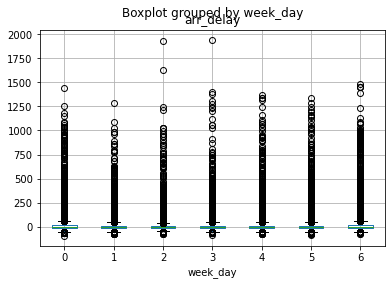

In [15]:
raw_dataset.boxplot(by='week_day', column='arr_delay')

<AxesSubplot:title={'center':'arr_delay'}, xlabel='week_day'>

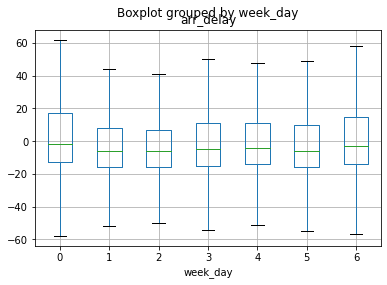

In [16]:
raw_dataset.boxplot(by='week_day', column='arr_delay', showfliers=False)

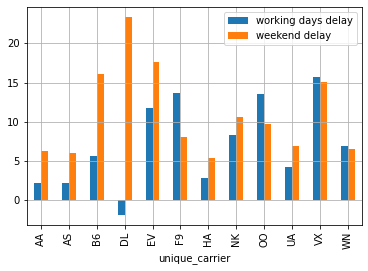

In [18]:
# Consider the weekend days only, compute, for each carrier, the mean arrival delay. Now consider
# the working days and compute, for each carrier, the mean arrival time.
# Then, compare the delays in working days and in weekends for each company.
# • Are you able to identify companies that are delayed only in weekends or only in working days?
# Why?

we_delay = raw_dataset.loc[raw_dataset.week_day > 4].groupby('unique_carrier').arr_delay.mean()
wd_delay = raw_dataset.loc[raw_dataset.week_day <= 4].groupby('unique_carrier').arr_delay.mean()

we_delay.name = "weekend delay"
wd_delay.name = "working days delay"
ax = pd.concat([wd_delay, we_delay], axis=1).plot.bar()
ax.grid(True)

In [19]:
# Create a Pandas DataFrame with amulti-index composed of the columns: unique_carrier, origin,
# dest, fl_date.

multi_df = raw_dataset.set_index(['unique_carrier', 'origin', 'dest', 'fl_date']).sort_index()
multi_df[multi_df.columns[:4]].head()

airline_id tail_num  fl_num  \
unique_carrier origin dest fl_date                                   
AA             ABQ    DFW  2017-01-01       19805   N4XSAA    1282   
                           2017-01-01       19805   N3NRAA    2611   
                           2017-01-01       19805   N4WNAA    2402   
                           2017-01-02       19805   N4XKAA    2611   
                           2017-01-02       19805   N4XBAA    2402   

                                       origin_airport_id  
unique_carrier origin dest fl_date                        
AA             ABQ    DFW  2017-01-01              10140  
                           2017-01-01              10140  
                           2017-01-01              10140  
                           2017-01-02              10140  
                           2017-01-02              10140

In [20]:

# For each flight operated by American Airlines (AA) and Delta Airlines (DL), taken off from the Los
# Angeles International Airport (LAX) and for each date, display the departure time and delay.

multi_df.loc[(['AA', 'DL'], ['LAX']), ['dep_time', 'dep_delay']]

dep_time  dep_delay
unique_carrier origin dest fl_date                        
AA             LAX    ATL  2017-01-01    1051.0       16.0
                           2017-01-01    1747.0      137.0
                           2017-01-02    1548.0       18.0
                           2017-01-02    2230.0       40.0
                           2017-01-02    1055.0       20.0
...                                         ...        ...
DL             LAX    TPA  2017-01-26    1146.0        1.0
                           2017-01-27    1137.0       -3.0
                           2017-01-29    1149.0        4.0
                           2017-01-30    1142.0       -3.0
                           2017-01-31    1206.0       21.0

[5437 rows x 2 columns]

In [21]:

# For each flight that flew in the first week of the month, with LAX as destination airport, compute the
# mean arrival delay.

''' Let's break down the problem. We first detect all the interested records. To do so, we can exploit the datetime type to filter on dates.'''

# fw_df = multi_df.loc[(:, :, 'LAX', '2017-01-01':'2017-01-08'), :] # not allowed
fw_df = multi_df.loc[(slice(None), slice(None), 'LAX', slice('2017-01-01','2017-01-08')), :]

# The first line of the previous cell is commented out, since the character : cannot be used to access
# index levels. If you want to use it anyway, pandas provides the IndexSlice object that handles the
# translation for you. The previous result would be obtained via:

fw_df = multi_df.loc[pd.IndexSlice[:, :, 'LAX', '2017-01-01':'2017-01-08'], :]
fw_df.groupby('fl_num')['arr_delay'].mean()

fl_num
1        0.000000
2       60.000000
4       11.625000
5        2.875000
7       16.750000
          ...    
6344    47.000000
6354    60.000000
6522    49.666667
6563    -8.000000
6710    10.000000
Name: arr_delay, Length: 1105, dtype: float64

In [24]:

# Generate a pivot table containing the number of departed flights for each carrier and for each day
# of the week and show it.
# Compute now the pairwise correlation between the carriers and show it on a heatmap.
# • What does this correlation matrix represent?
# 5
# • Can you find any carrier with different flight plans?

cfd = pd.pivot_table(raw_dataset, values='fl_num', index='unique_carrier', columns='week_day', aggfunc='count')
cfd

week_day,0,1,2,3,4,5,6
unique_carrier,,,,,,,
AA,12035,11457,9651,9854,9820,7905,11430
AS,2440,2261,1806,1935,1953,1762,2297
B6,4063,3942,3143,3258,3169,2643,3859
DL,12157,11512,9248,9695,9521,6492,10406
EV,5935,5649,4627,4923,4774,2905,5065
F9,1239,1214,976,983,986,955,1245
HA,987,966,791,802,864,826,1022
NK,1954,1970,1616,1610,1563,1470,1946
OO,8321,7912,6413,6631,6667,4913,7409


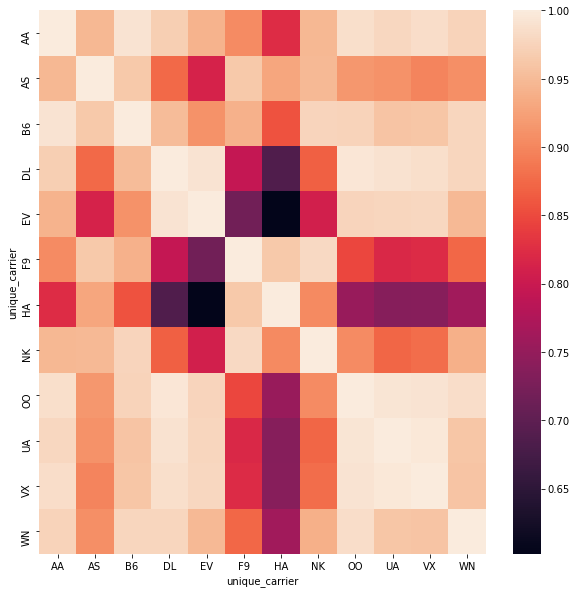

In [27]:

plt.figure(figsize=(10,10))
_ = sns.heatmap(cfd.T.corr())

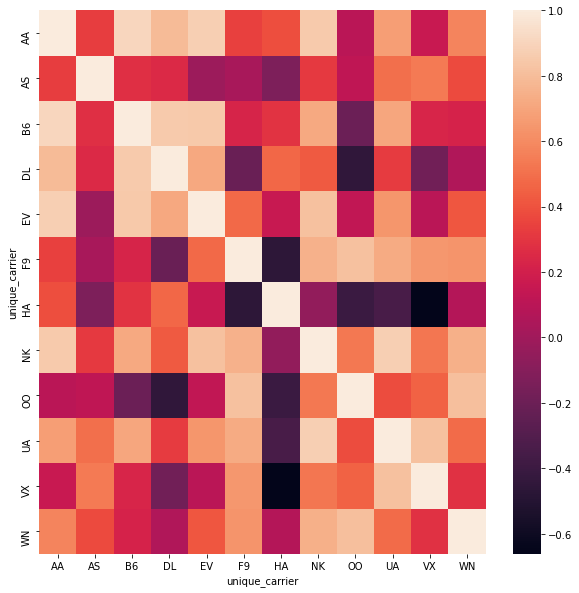

In [29]:
# Generate a pivot table containing the average arrival delay, for each carrier and for each day of the
# week and show it.
# Compute now the pairwise correlation between the carriers and show it on a heatmap.
# • What does this correlation matrix represent?
# • Can you find any carrier with different delay behaviors?

plt.figure(figsize=(10,10))
_ = sns.heatmap(pd.pivot_table(raw_dataset, values='arr_delay', index='unique_carrier', columns='week_day', aggfunc='mean').T.corr())

In [32]:

# Using a pivot table, for the carriers HA, DL, AA and AS compute the average deltadelay for each
# day of the week. Then, display the results on a line plot, having a line per carrier and the weekday
# on the x-axis

mask = raw_dataset.unique_carrier.isin(["HA", "DL", "AA", "AS"])
dcw = pd.pivot_table(raw_dataset.loc[mask], values='delta_delay', index='unique_carrier', columns='week_day', aggfunc='mean')
dcw

week_day,0,1,2,3,4,5,6
unique_carrier,,,,,,,
AA,-3.576209,-4.621619,-4.601184,-4.091436,-3.553686,-4.558771,-3.747053
AS,-1.690789,-1.625446,-1.889198,-2.130705,-2.624551,-3.453872,0.542632
DL,-8.913563,-10.211625,-10.544913,-10.604603,-9.623199,-5.979988,-7.001644
HA,0.258359,0.307772,0.759189,0.390762,0.746528,1.330508,1.207066
